## [Znajdowanie pierwiastków](https://github.com/kzajac/Mownit2018/blob/master/Mownit_Lab6.ipynb)

In [3]:
using Roots  
using Plots
using ForwardDiff


### Zadanie 1.

Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b> Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b>

Wybieram funkcje:

In [2]:
function f1(x)
   sin(x) - x/2 
end
function f3(x)
    x*exp(-x)
end
function f5(x)
    (x+3)*(x-1)^2
end
function f11(x) # Pinhead
     ( 16.0 - x ^ 4 ) / ( 16.0 * x ^ 4 + eps(Float64) )
end
function f14(x) # The Camel
    1.0 / ( ( x - 0.3 )^2 + 0.01)+ 1.0/((x-0.9)^2 + 0.04 )+ 2.0 * x - 5.2
end
function f15(x) # Pathological for Newton's method
   if ( x < 0.0 )
        -abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 )
    else 
        abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 ) 
    end
end


f15 (generic function with 1 method)

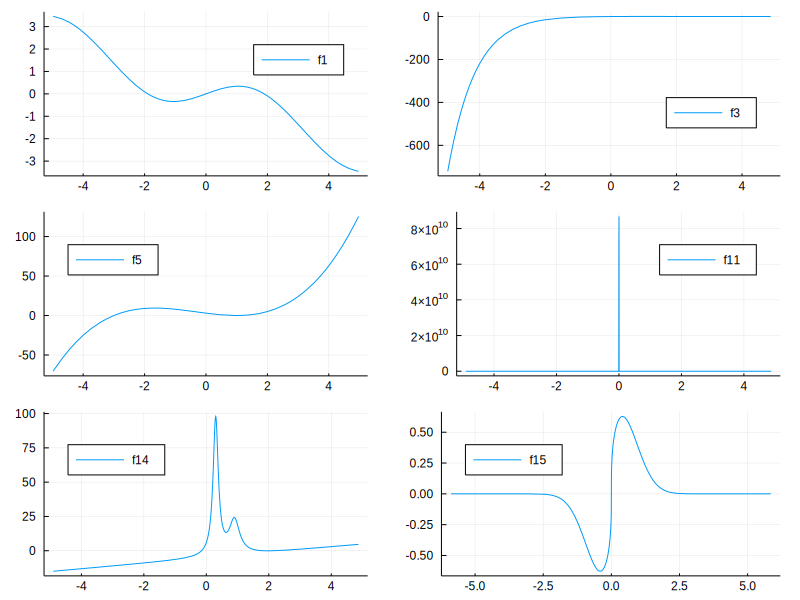

In [3]:
p1 = plot(f1, -5, 5,label="f1",legend=:topright)
p3 = plot(f3, -5, 5,label="f3",legend=:bottomright)
p5 = plot(f5, -5, 5,label="f5",legend=:topleft)
p11 = plot(f11, -5, 5,label="f11",legend=:topright)
p14 = plot(f14, -5, 5,label="f14",legend=:topleft)
p15 = plot(f15, -6, 6,label="f15",legend=:topleft)
plot(p1,p3,p5,p11,p14,p15,layout=(3,2),size=(800,600))


Dla każdej z funkcji staram się znaleźć pierwiastek za pomocą metody bisekcji.

In [2]:
# find_zero(f1, (-4.5, -1.0), Bisection(), verbose = true)
# find_zero(f3, (-4.5, 1.0), Bisection(), verbose = true)
# find_zero(f5, (-4.5, 10.0), Bisection(), verbose = true)
# find_zero(f11, (-4.5, 0.0001), Bisection(), verbose = true)
# find_zero(f14, (-4.5, 4), Bisection(), verbose = true)
# find_zero(f15, (-1.0,1.0), Bisection(), verbose = true)

In [5]:
D(f) = x -> ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

Dla każdej z funkcji staram się znaleźć pierwiastek za pomocą metody Newtona.

In [132]:
# find_zero((f1, D(f1)),-4, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),2, Roots.Newton(),verbose=true) # średnio działa
# find_zero((f5, D(f5)),-4, Roots.Newton(),verbose=true)
# find_zero((f11, D(f11)),-1, Roots.Newton(),verbose=true) # działa ok dla -1 i 1
# find_zero((f14, D(f14)),2, Roots.Newton(),verbose=true)
# find_zero((f15, D(f15)),-4, Roots.Newton(),verbose=true)

Dla każdej z funkcji staram się znaleźć pierwiastek za pomocą metody siecznych.

In [131]:
# find_zero(f1, -4, Order1(),  verbose=true)
# find_zero(f3, -4, Order1(),  verbose=true)
# find_zero(f5, -4, Order1(),  verbose=true)
# find_zero(f11, -1, Order1(),  verbose=true) # działa ok dla -1 i 1
# find_zero(f14, -4, Order1(),  verbose=true)
# find_zero(f15, -4, Order1(),  verbose=true)

Porównuję wyniki uzyskane w eksperymentach.

In [130]:
println("f1:  ", f1(-1.895494267033981)," ", f1(-1.895494267033981)," ",f1(-1.895494267033981))
println("f3:  ",f3(0.0)," ",f3(35.31795233577321)," ",f3(-9.591945638057392e-19))
println("f5:  ",f5(-3.0)," ",f5(-3.0)," ",f5(-3.0))
println("f11: ",f11(-2.0)," ",f11(-2.0)," ",f11(-1.9999999999999998))
println("f14: ",f14(-0.1534804948126991)," ",f14(2.1274329318603376)," ",f14(2.1274329318603376))
println("f15: ",f15(0)," ",f15(-5.858586374006785)," ",f15(-5.820098815756444))

f1:  0.0 0.0 0.0
f3:  0.0 1.6203308642146207e-14 -9.591945638057392e-19
f5:  0.0 0.0 0.0
f11: 0.0 0.0 2.7755575615628926e-17
f14: 8.881784197001252e-16 0.0 0.0
f15: 0.0 -2.2367968698607792e-15 -3.4984916431003897e-15


In [136]:
using DataFrames
using CSV
raw = CSV.read("results.csv")

,type,function,iterations,evaluations,result
,String⍰,String⍰,Int64⍰,Int64⍰,Float64⍰
1,bisection,f1,51,53,-1.89549
2,newton,f1,6,13,-1.89549
3,secant,f1,8,10,-1.89549
4,bisection,f3,0,2,0.0
5,newton,f3,30,61,35.318
6,secant,f3,15,17,-9.59195e-19
7,bisection,f5,51,53,-3.0
8,newton,f5,6,13,-3.0
9,secant,f5,8,10,-3.0


### Zadanie 2.
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

Funkcją, która mnie zaciekawiła była funkcja postaci _f(x) = xe<sup>-x</sup>_. Metody szukające pierwiastków nie zawsze szukają pierwiastka tam, gdzie powinien być. Oczywistym jest, że _f(0) = 0_, zaś _lim<sub>x→∞</sub> f(x) = 0_. Jednak zwróćmy uwagę, co się dzieje dla poszczególnych metod.

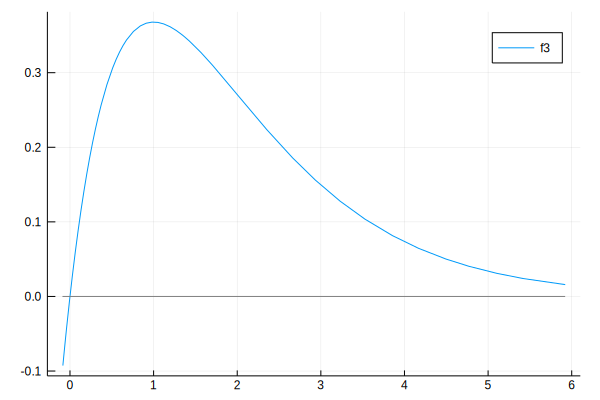

In [27]:
plot(f3, -0.1, 6,label="f3",legend=:topright)
plot!(x->0, -0.15,6,label="",color=:grey)

In [1]:
# find_zero(f3, (-4.5, 1.0), Bisection(), verbose = true)
# find_zero(f3, (-70.5, 20.0), Bisection(), verbose = true)

Metoda bisekcji zdaje się być zaimplementowana w taki sposób, żeby sprawdzać 0, jeśli tylko należy do przedziału początkowego. Psuje nam to nieco ogląd na sposób jej działania, chociaż możemy uznać, że to dość sprytne usprawnienie. Następną metodą jest metoda Newtona:

In [2]:
# find_zero((f3, D(f3)),-35, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),-34, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),0.97, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),0.98, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),1.1, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),5, Roots.Newton(),verbose=true)
# find_zero((f3, D(f3)),10, Roots.Newton(),verbose=true)

Rezultaty są interesujące:
- dla x ∈ (-∞, -35] funkcja nie może znaleźć pierwiastka w 42 iteracjach, więc zatrzymuje się;
- dla x ∈ [-34, 0) funkcja znajduje pierwiastek w losowym ϵ niedaleko 0;
- dla x = 0 funkcja znajduje pierwiastek w 0;
- dla x ∈ (0,1) funkcja znajduje pierwiastek w losowym ϵ niedaleko 0;
- dla x = 1±ϵ funkcja nie znajduje pierwiastka (styczna w x=1 jest równoległa do osi OX);
- dla x ∈ (1, ∞) funkcja znajduje niepoprawnie pierwiastek (najczęściej w okolicach 35), gdyż po wielu iteracjach uważa, że dotarła najbliżej do pierwiastka, jak tylko mogła, niestety pierwiastka tam nie ma, gdyż f(x) dąży do 0.

Metoda siecznych:

In [96]:
# find_zero(f3, -23, Order1(),  verbose=true)
# find_zero(f3, -22, Order1(),  verbose=true)
# find_zero(f3, -0.01, Order1(),  verbose=true)
# find_zero(f3, 0, Order1(),  verbose=true)
# find_zero(f3, 0.01, Order1(),  verbose=true)
# find_zero(f3, 0.86, Order1(),  verbose=true)
# find_zero(f3, 0.87, Order1(),  verbose=true)
# find_zero(f3, 1.1, Order1(),  verbose=true)
# find_zero(f3, 5, Order1(),  verbose=true)

Podobnie jak dla metody Newtona, jedynym przedziałem, który znajduje nam (względnie) poprawnie pierwiastek to (-22, 0.86). W przeciwnym razie funkcja albo potrzebuje zbyt wielu powtórzeń albo po prostu działa nieprawidłowo.

### Zadanie 3.
Namalowac <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny.

** Rozwiązanie znajduje się w pliku _Untitled1.ipynb_.**